In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: deliveries.csv          
  inflating: matches.csv             
  inflating: points_table.csv        


EDA

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/matches.csv')
df.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [ ]:
df.dtypes

season              object
team1               object
team2               object
date                object
match_number         int64
venue               object
city                object
toss_winner         object
toss_decision       object
player_of_match     object
umpire1             object
umpire2             object
reserve_umpire      object
match_referee       object
winner              object
winner_runs        float64
winner_wickets     float64
match_type          object
dtype: object

In [ ]:
df.shape

(32, 18)

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0    2023-10-05
1    2023-10-06
2    2023-10-07
3    2023-10-07
4    2023-10-08
5    2023-10-09
6    2023-10-10
7    2023-10-10
8    2023-10-11
9    2023-10-12
10   2023-10-13
11   2023-10-14
12   2023-10-15
13   2023-10-16
14   2023-10-17
15   2023-10-18
16   2023-10-19
17   2023-10-20
18   2023-10-21
19   2023-10-21
20   2023-10-22
21   2023-10-23
22   2023-10-24
23   2023-10-25
24   2023-10-26
25   2023-10-27
26   2023-10-28
27   2023-10-28
28   2023-10-29
29   2023-10-30
30   2023-10-31
31   2023-11-01
Name: date, dtype: datetime64[ns]

In [ ]:
df.describe()

,match_number,winner_runs,winner_wickets
count,32.000000,16.000000,16.000000
mean,16.500000,121.250000,6.375000
std,9.380832,74.981331,1.962142
min,1.000000,5.000000,1.000000
25%,8.750000,78.000000,5.750000
50%,16.500000,101.000000,7.000000
75%,24.250000,149.000000,8.000000
max,32.000000,309.000000,9.000000


In [ ]:
df.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        16
winner_wickets     16
match_type          0
dtype: int64

In [ ]:
df['winner_runs'].fillna(0, inplace=True)
df['winner_wickets'].fillna(0, inplace=True)

In [ ]:
df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(list(df['team1']))
df['team1_cat'] = df['team1'].apply(lambda x: le.transform([x])[0])
le.fit(list(df['team2']))
df['team2_cat'] = df['team2'].apply(lambda x: le.transform([x])[0])
le.fit(list(df['venue']))
df['venue_cat'] = df['venue'].apply(lambda x: le.transform([x])[0])
le.fit(list(df['toss_winner']))
df['toss_winner_cat'] = df['toss_winner'].apply(lambda x: le.transform([x])[0])
le.fit(list(df['toss_decision']))
df['toss_decision_cat'] = df['toss_decision'].apply(lambda x: le.transform([x])[0])
df[['team1_cat', 'team1', 'team2_cat', 'team2', 'venue_cat', 'venue', 'toss_winner_cat', 'toss_winner', 'toss_decision_cat', 'toss_decision']]

,team1_cat,team1,team2_cat,team2,venue_cat,venue,toss_winner_cat,toss_winner,toss_decision_cat,toss_decision
0,3,England,6,New Zealand,7,Narendra Modi Stadium,6,New Zealand,1,field
1,7,Pakistan,5,Netherlands,8,Rajiv Gandhi International Stadium,5,Netherlands,1,field
2,0,Afghanistan,2,Bangladesh,3,Himachal Pradesh Cricket Association Stadium,2,Bangladesh,1,field
3,8,South Africa,9,Sri Lanka,0,Arun Jaitley Stadium,9,Sri Lanka,1,field
4,1,Australia,4,India,5,MA Chidambaram Stadium,1,Australia,0,bat
5,6,New Zealand,5,Netherlands,8,Rajiv Gandhi International Stadium,5,Netherlands,1,field
6,3,England,2,Bangladesh,3,Himachal Pradesh Cricket Association Stadium,2,Bangladesh,1,field
7,9,Sri Lanka,7,Pakistan,8,Rajiv Gandhi International Stadium,9,Sri Lanka,0,bat
8,0,Afghanistan,4,India,0,Arun Jaitley Stadium,0,Afghanistan,0,bat
9,8,South Africa,1,Australia,1,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,Australia,1,field


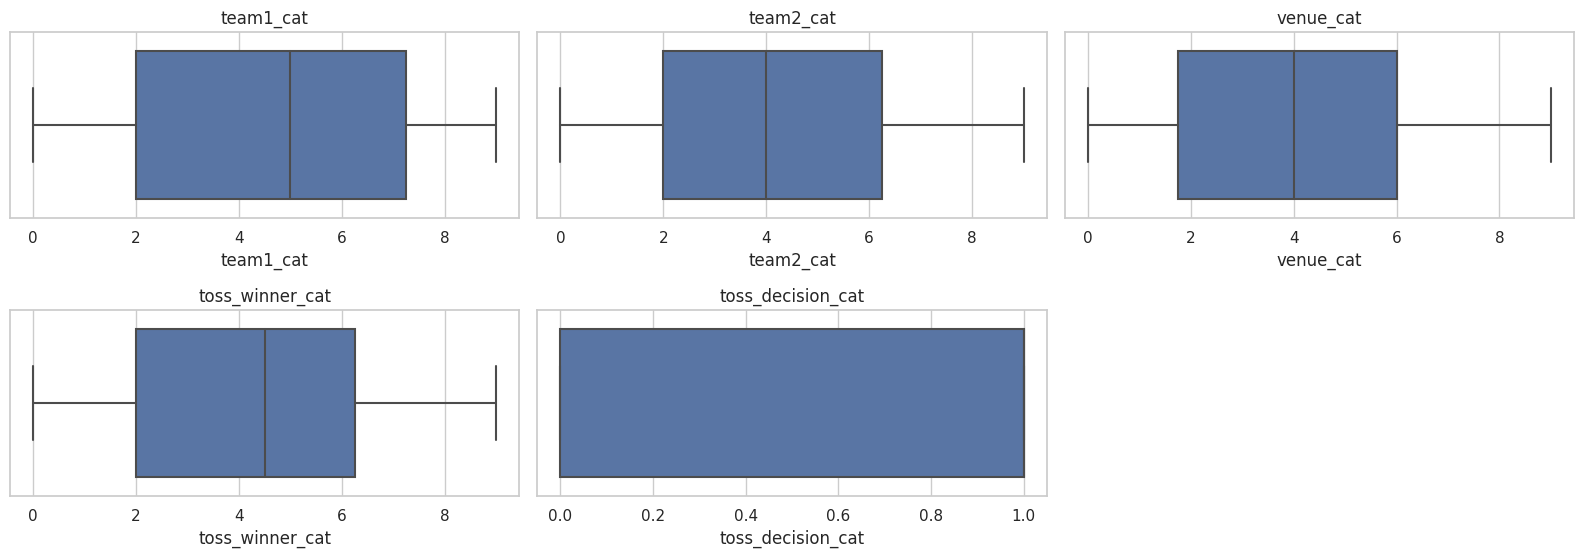

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# Flatten the 2D axes array into a 1D array
axes = axes.flatten()

# Set the seaborn theme
sns.set_theme(style="whitegrid")

# List of columns to plot
columns_to_plot = ['team1_cat', 'team2_cat', 'venue_cat', 'toss_winner_cat', 'toss_decision_cat']

# Loop through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


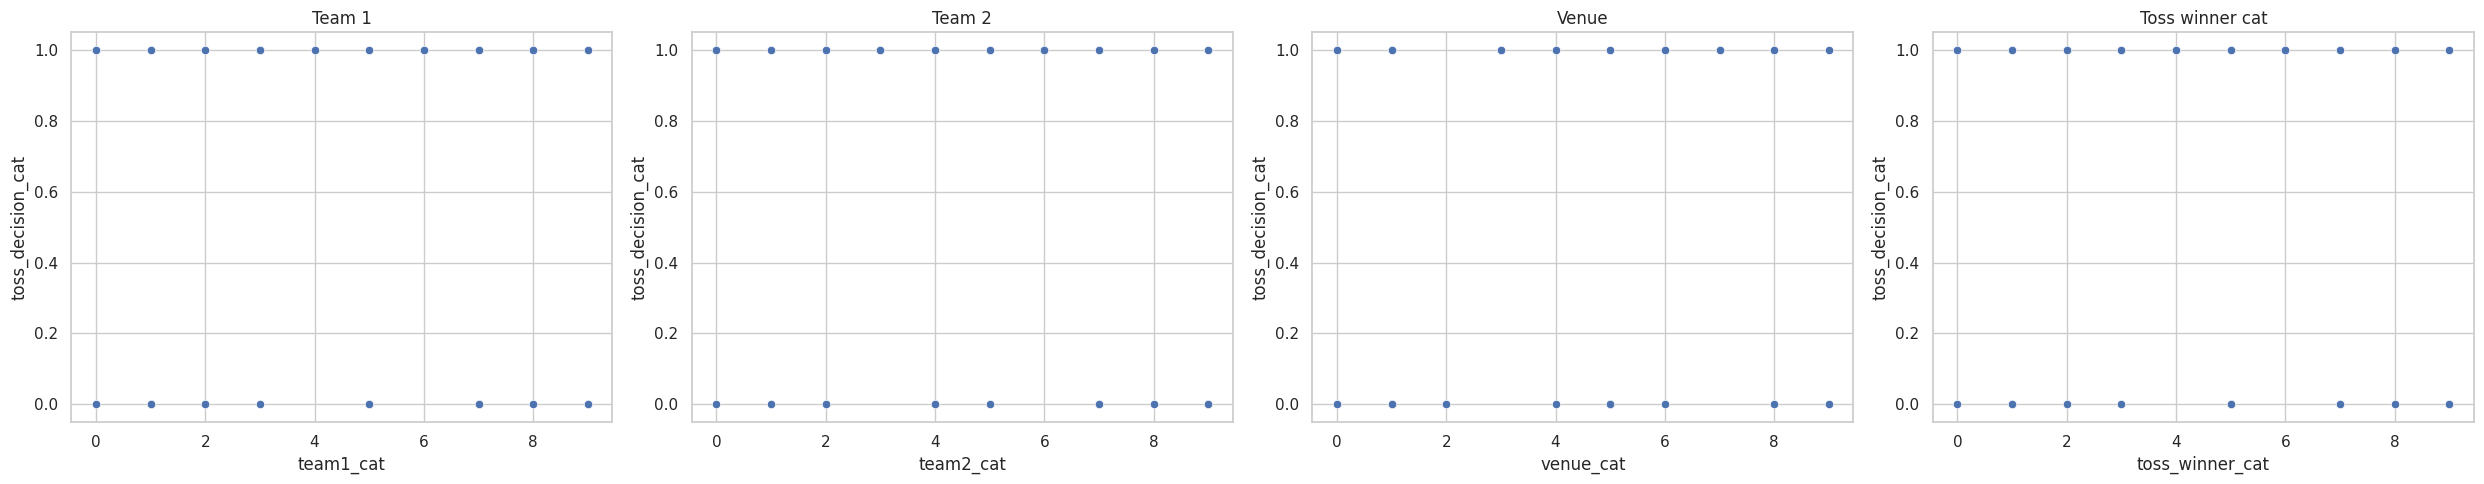

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# Scatterplot for team1_cat
sns.scatterplot(x=df["team1_cat"], y=df["toss_decision_cat"], ax=axes[0])
axes[0].set_title("Team 1")

# Scatterplot for team2_cat
sns.scatterplot(x=df["team2_cat"], y=df["toss_decision_cat"], ax=axes[1])
axes[1].set_title("Team 2")

# Scatterplot for venue_cat
sns.scatterplot(x=df["venue_cat"], y=df["toss_decision_cat"], ax=axes[2])
axes[2].set_title("Venue")

# Scatterplot for toss_winner_cat
sns.scatterplot(x=df["toss_winner_cat"], y=df["toss_decision_cat"], ax=axes[3])
axes[3].set_title("Toss winner cat")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

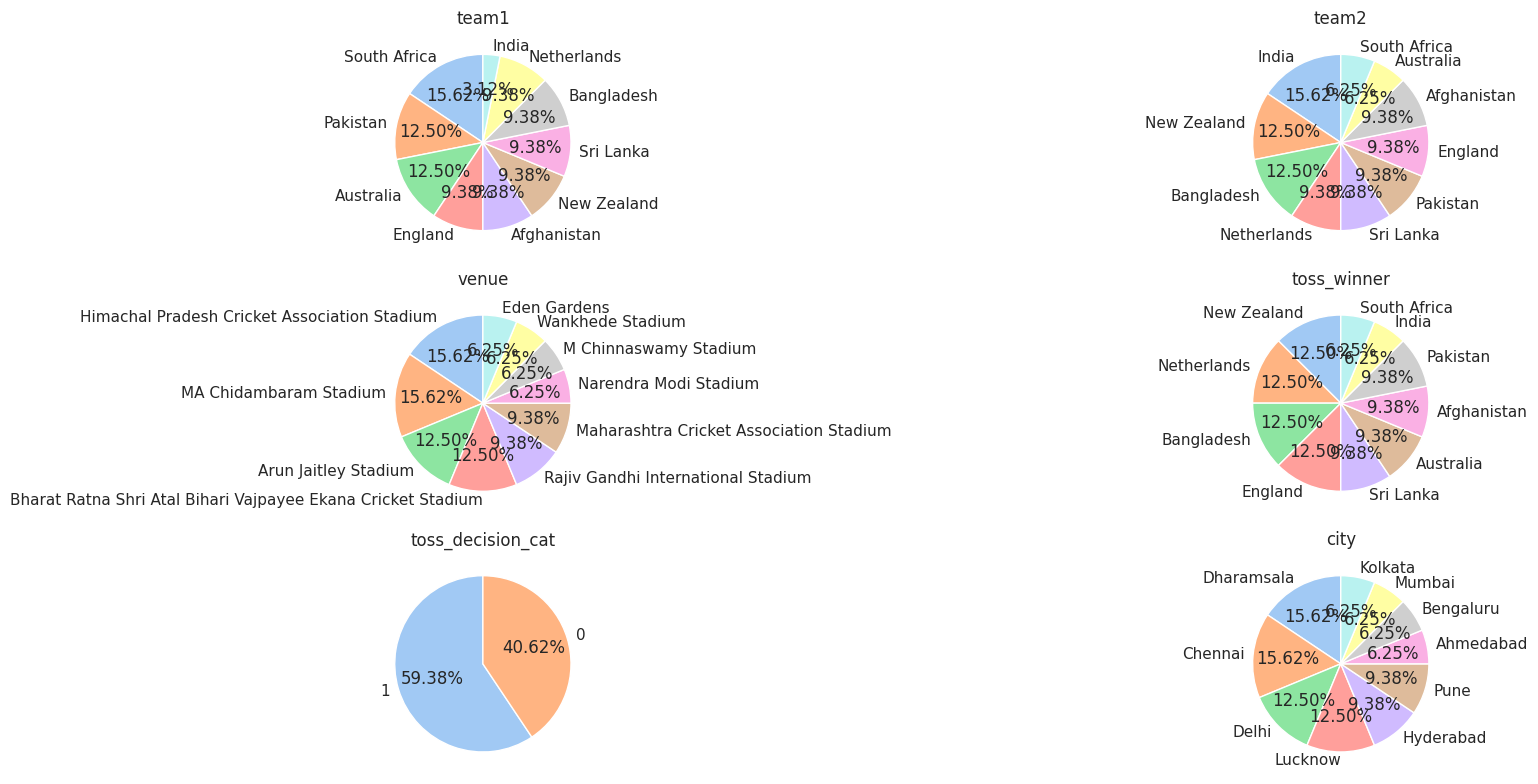

In [ ]:
features1 = ["team1", "team2", "venue", "toss_winner", "toss_decision_cat","city"]
fig, ax = plt.subplots(3, 2, figsize=(20, 8))

for axid, col in enumerate(features1):
    col_dist = df[col].value_counts()
    pie_colors = sns.color_palette('pastel', n_colors=len(col_dist))
    ax_row, ax_col = divmod(axid, 2)
    ax[ax_row, ax_col].pie(col_dist, labels=col_dist.index, colors=pie_colors, autopct='%1.2f%%', startangle=90)
    ax[ax_row, ax_col].set_title(col)

plt.tight_layout()
plt.show()

<ipython-input-25-67f08f3783e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


<Axes: >

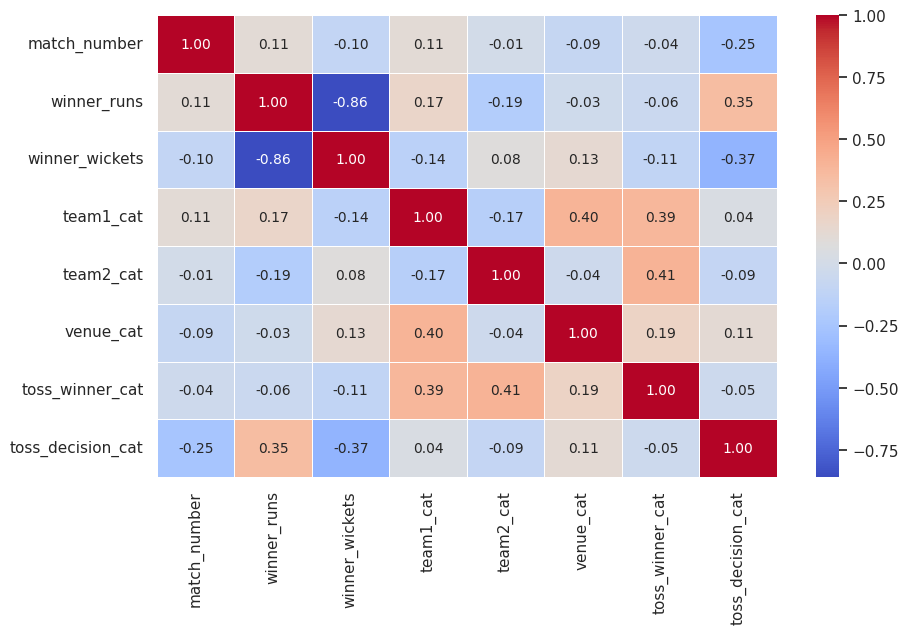

In [ ]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

In [28]:
data = df[['team1_cat','team2_cat','venue_cat','toss_winner_cat', 'toss_decision_cat']]

In [29]:
features = ['team1_cat','team2_cat','venue_cat','toss_winner_cat', 'toss_decision_cat']

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def train_and_evaluate_neural_network(data, features):
    # Split the data into training and testing sets
    X = data[features]
    y = data['toss_decision_cat']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

    # Make predictions on the testing set
    predictions = model.predict(X_test_scaled)
    binary_predictions = np.round(predictions)

    # Evaluate the model
    precision = precision_score(y_test, binary_predictions, average='weighted')
    accuracy = accuracy_score(y_test, binary_predictions)

    # Display evaluation metrics
    print(f"Precision: {(precision * 100).round(2)}")
    print(f"Accuracy: {(accuracy * 100).round(2)}")

    # Add predicted values to the DataFrame
    test_results = pd.DataFrame({'Original': y_test, 'Predicted': binary_predictions.flatten()})

    return model, test_results

# Assuming 'df' is your DataFrame and 'features' are the features used
trained_model, test_results = train_and_evaluate_neural_network(df, features)

# Display the DataFrame with original and predicted values
print("Test Results:")
print(test_results)


Epoch 1/10
1/1 [==============================] - 1s 607ms/step - loss: 0.7178 - accuracy: 0.5909 - val_loss: 0.5823 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7019 - accuracy: 0.5909 - val_loss: 0.5807 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6867 - accuracy: 0.5909 - val_loss: 0.5792 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 0.6720 - accuracy: 0.6818 - val_loss: 0.5776 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6580 - accuracy: 0.6818 - val_loss: 0.5755 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6446 - accuracy: 0.6818 - val_loss: 0.5727 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6316 - accuracy: 0.6818 - val_loss: 0.5699 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==========

1/1 [==============================] - 0s 50ms/step
Precision: 88.57
Accuracy: 85.71
Test Results:
    Original  Predicted
29         1        1.0
15         1        1.0
24         0        0.0
17         1        1.0
8          0        1.0
9          1        1.0
30         0        0.0
